In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dados = pd.read_csv('dados/sales_train.csv')
item_cat = pd.read_csv("dados/item_categories.csv")
item = pd.read_csv("dados/items.csv")
sub = pd.read_csv("dados/sample_submission.csv")
shops = pd.read_csv("dados/shops.csv")
test = pd.read_csv("dados/test.csv")

In [15]:
dados.head()

,data,mes_consecutivo,loja_id,item_id,preco_item,venda_item_dia
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [16]:
dados['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
593          1
13866        1
16574        1
20668        1
0            1
Name: item_id, Length: 21807, dtype: int64

In [17]:
dados = dados[dados['venda_item_dia'] < 2000]

In [18]:
dados = dados[dados['preco_item'] < 300000]

In [19]:
correcao_preco = dados[(dados['loja_id'] == 32) & (dados['item_id'] == 2973) & (dados['mes_consecutivo'] == 4) & (dados['preco_item'] > 0)].preco_item.median()

In [20]:
dados.loc[dados['preco_item'] < 0, 'preco_item'] = correcao_preco

In [21]:
dados.head()

,data,mes_consecutivo,loja_id,item_id,preco_item,venda_item_dia
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
dados.loja_id.value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34692
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: loja_id, dtype: int64

In [23]:
dados_loja_31 = dados[dados['loja_id'] == 31]

In [27]:
dados_loja_31.item_id.value_counts()

20949    863
5822     602
17717    478
7856     436
4181     400
        ... 
549        1
3124       1
5175       1
8476       1
6339       1
Name: item_id, Length: 14416, dtype: int64

In [30]:
dados_31_item_863 = dados_loja_31[dados_loja_31['item_id']==20949]

In [39]:
dados_31_item_863.iloc[855:863]

,data,mes_consecutivo,loja_id,item_id,preco_item,venda_item_dia
2888820,25.10.2015,33,31,20949,5.0,13.0
2888821,26.10.2015,33,31,20949,5.0,11.0
2888822,27.10.2015,33,31,20949,5.0,9.0
2888823,28.10.2015,33,31,20949,5.0,2.0
2888824,29.10.2015,33,31,20949,5.0,10.0
2888825,30.10.2015,33,31,20949,5.0,17.0
2888826,31.10.2015,33,31,20949,5.0,16.0
2888828,10.10.2015,33,31,20949,5.0,24.0


In [48]:
ts = dados_31_item_863.groupby(["mes_consecutivo"])["venda_item_dia"].sum()
ts.index = pd.date_range(start = '2013-04-26',end='2015-10-01', freq = 'MS')
ts = ts.reset_index()
ts = ts.rename(columns = {'index':'mes'})
ts.head(10)

,mes,venda_item_dia
0,2013-05-01,13.0
1,2013-06-01,384.0
2,2013-07-01,763.0
3,2013-08-01,799.0
4,2013-09-01,820.0
5,2013-10-01,950.0
6,2013-11-01,978.0
7,2013-12-01,989.0
8,2014-01-01,1305.0
9,2014-02-01,899.0


In [49]:
ts.to_csv('ts_item20949.csv',index=False)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ts = pd.read_csv('ts_item20949.csv', parse_dates = ['mes'], index_col = 'mes', date_parser = dateparse)

In [51]:
ts = ts.rename(columns = {'venda_item_dia':'vendas'})
ts.head()

,vendas
mes,
2013-05-01,13.0
2013-06-01,384.0
2013-07-01,763.0
2013-08-01,799.0
2013-09-01,820.0


In [52]:
ts_no_constants = ts.loc[:, (ts != ts.iloc[0]).any()]

In [53]:
ts_no_constants.dropna()
data = (ts_no_constants - ts_no_constants.mean()) / ts_no_constants.std()
data

,vendas
mes,
2013-05-01,-2.321249
2013-06-01,-0.999334
2013-07-01,0.351085
2013-08-01,0.479357
2013-09-01,0.554183
2013-10-01,1.017387
2013-11-01,1.117154
2013-12-01,1.156349
2014-01-01,2.282292


In [68]:
from statsmodels.tsa.arima_model import ARIMA
modelo = ARIMA(data, order=(1, 0, 1))

C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [69]:
modelo_train = modelo.fit()

In [70]:
previsoes = modelo_train.forecast(steps = 12)

In [71]:
previsoes[0]

array([-0.61643937, -0.33834489, -0.2162909 , -0.16272214, -0.13921113,
       -0.12889229, -0.12436341, -0.12237572, -0.12150333, -0.12112044,
       -0.1209524 , -0.12087864])

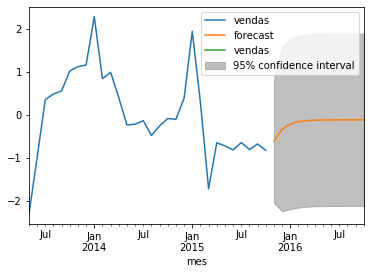

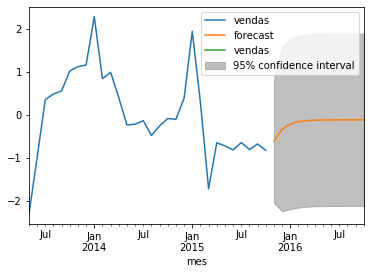

In [77]:
eixo = data.plot()
modelo_train.plot_predict('2015-11-01','2016-10-01', ax = eixo, plot_insample = True) # Grafico de previsão de vendas